# Visualization

1. Read an CSV file.
2. Show number of publications by month.
3. Generate and visualize summary statistics
4. Visualize trend of publication numbers by month

In [162]:
from datetime import datetime

import matplotlib as pl
from matplotlib import pyplot as pp
import pandas as pd
import numpy as np
from scipy import stats


#csv_fname = 'db/HIV.csv'
csv_fname = 'db/medulloblastoma.csv'

Read CSV file and generate data

In [65]:
df = pd.read_csv(csv_fname, index_col=0)

In [66]:
def to_dates(xs):
    dates = []
    for x in xs:
        try:
            d = datetime.strptime(x, '%Y %b %d')
        except ValueError:
            try:
                d = datetime.strptime(x, '%Y %b')
            except ValueError:
                d = None
        dates.append(d)
    return dates

def year_month(s):
    try:
        y = s[:s.rindex('-')]
    except ValueError:
        y = None
    return y

df['date'] = to_dates(df['DP'])
df['month'] = [year_month(str(x)) for x in df['date']]

In [85]:
per_month = df.groupby(['month'])['month'].count()
print(per_month)

month
2019-12     6
2020-01    12
2020-02    12
2020-03    21
2020-04    20
2020-05    24
2020-06    29
2020-07    33
2020-08    26
2020-09    32
2020-10    30
2020-11    31
2020-12    20
2021-01    12
2021-02    21
2021-03    11
2021-04     9
2021-05     5
2021-06     1
2021-08     2
2021-09     1
2021-10     3
Name: month, dtype: int64


In [97]:
def summary(xs):
    return {
        'mean': np.mean(xs),
        'std': np.std(xs),
        'quartiles': np.quantile(xs, [0.25, 0.50, 0.75]),
        'range': (np.amin(xs), np.amax(xs)),
    }

per_month_stats = summary(per_month)
print(per_month_stats)

{'mean': 16.40909090909091, 'std': 10.735070355483941, 'quartiles': array([ 6.75, 16.  , 25.5 ]), 'range': (1, 33)}


In [240]:
df_by_month = df.groupby(['month'])[df.columns[0]].agg(['count'])
df_by_month['month'] = df_by_month.index
df_by_month['count_ci_lower'] = stats.poisson.ppf(0.05, per_month.values)
df_by_month['count_ci_upper'] = stats.poisson.ppf(0.95, per_month.values)
df_by_month

,count,month,count_ci_lower,count_ci_upper
month,,,,
2019-12,6,2019-12,2.0,10.0
2020-01,12,2020-01,7.0,18.0
2020-02,12,2020-02,7.0,18.0
2020-03,21,2020-03,14.0,29.0
2020-04,20,2020-04,13.0,28.0
2020-05,24,2020-05,16.0,32.0
2020-06,29,2020-06,20.0,38.0
2020-07,33,2020-07,24.0,43.0
2020-08,26,2020-08,18.0,35.0


## Matplotlib

Plot using `matplotlib` directly

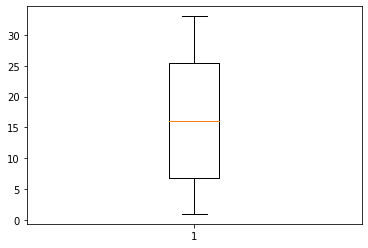

In [154]:
pp.boxplot(per_month)
pp.show()

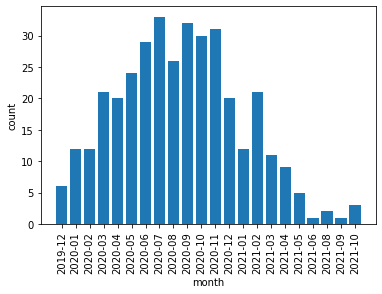

In [124]:
pp.bar(per_month.index, per_month.values)
pp.xlabel('month')
pp.ylabel('count')
pp.xticks(rotation=90)
pp.show()

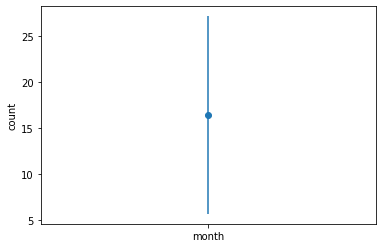

In [151]:
pp.errorbar(['month'], per_month_stats['mean'],
            yerr=per_month_stats['std'], fmt='o')
pp.ylabel('count')
pp.show()

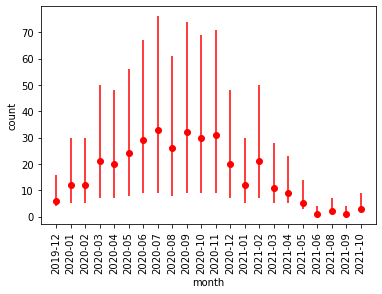

In [225]:
# compute Poisson confidence intervals
per_month_ci = np.vstack([
    stats.poisson.ppf(0.05, per_month.values),
    stats.poisson.ppf(0.95, per_month.values)
])

pp.errorbar(per_month.index, per_month.values,
            yerr=per_month_ci, fmt='ro')
pp.xticks(rotation=90)
pp.xlabel('month')
pp.ylabel('count')
pp.show()

Plot using `pandas` plot wrapper

<AxesSubplot:ylabel='count'>

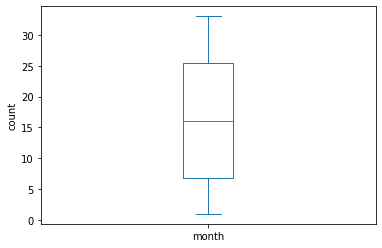

In [153]:
per_month.plot(kind='box', ylabel='count')

<AxesSubplot:xlabel='month', ylabel='count'>

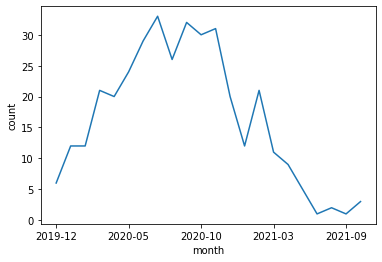

In [126]:
per_month.plot(ylabel='count')

<AxesSubplot:xlabel='month', ylabel='count'>

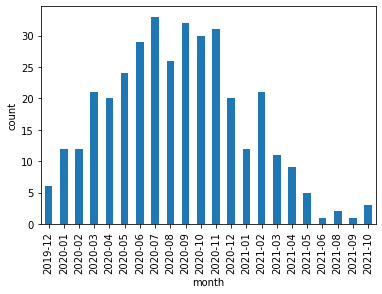

In [127]:
per_month.plot(kind='bar', ylabel='count')

## Plotly

In [230]:
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)

In [232]:
# this requires the plotly extension for jupyterlab
fig = px.line(df_by_month, x=df_by_month.index, y='count')
fig.show()

## ggplot

In [233]:
from plotnine import *

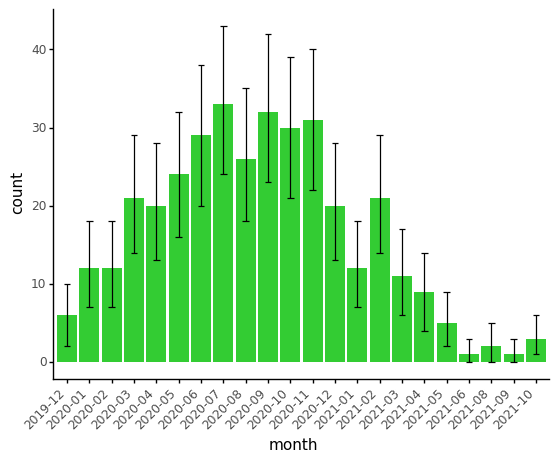

<ggplot: (8782070396260)>

In [260]:
(
    ggplot(df_by_month, aes(x='month', y='count')) +
        theme_classic() +
        geom_col(fill='#33cc33') +
        geom_errorbar(
            aes(ymin='count_ci_lower', ymax='count_ci_upper'),
            width = 0.3
        ) +
        theme(axis_text_x = element_text(angle=45, hjust=1))
)